# Customer analysis

In this exercise, you work for a consulting firm as data analyst. One of your clients asked for help to understand its customer buying behavior. 

You dispose of a dataset from its e-commerce website with 13 features : 

- order_id : ID if the order
- order_status : Status of the order
- order_purchase_timestamp : Timestamp of the purchase
- order_delivered_customer_date : Timestamp of the delivery to the customer
- payment_type : Method of payment
- payment_installments : Number of payments for this purchase (does NOT affect the payment value)
- payment_value : Total amount of the payment
- review_score : Score given by the client, ranges from 1 to 5
- customer_unique_id : ID of the customer who purchased
- customer_zip_code_prefix : Zip code of the customer
- customer_city : City of the customer
- customer_state : State of the customer
- product_category_name_english : Name of the product category in English

With this data, you have to analyze customer behavior with two techniques:

- Customer segmentation with RFM
- Cohort analysis from Sept 2016 to October 2018.

At the end, you have to present your analysis with actionable insights to improve the customer relationship of your client. 

# Understanding RFM Segmentation 

❓ What are the 3 metrics used in an RFM Segmentation? (hint : What does RFM stand for?) 

❓ Can you summarize what each metric measures in one sentence?

❓ What data / or type of data do you need for each metric ? 

Let's explore the dataset!

# Exploratory Data Analysis

Load the dataset and start an Exploratory Data Analysis

In [1]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Imen/Downloads/projet alisson/segmentation client/db_customers.csv')
df

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105378,105378,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,credit_card,3.0,85.08,5,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,health_beauty
105379,105379,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,credit_card,3.0,195.00,4,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,baby
105380,105380,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,credit_card,5.0,271.01,5,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,home_appliances_2
105381,105381,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,credit_card,4.0,441.16,2,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,computers_accessories


In [3]:
df.dtypes

Unnamed: 0                         int64
order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_delivered_customer_date     object
payment_type                      object
payment_installments             float64
payment_value                    float64
review_score                       int64
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
product_category_name_english     object
dtype: object

❓ Which features should be formated in datetime ? 
Convert them

In [4]:
from datetime import datetime 
df['order_purchase_timestamp'] = df['order_delivered_customer_date'].apply(pd.to_datetime)
date_format = "%m/%d/%Y"

❓ Which features are Categorical ? List the unique values on these features.

In [5]:
# Unique values for categorical features
order_status=df['order_status'].unique()
payment_type=df['payment_type'].unique()
customer_city=df['customer_city'].unique()
customer_state=df['customer_state'].unique()
product_category_name_english=df['product_category_name_english'].unique()

print(f'order status: {order_status}')
print(f'payment_type: {payment_type}')
print(f'order status: {customer_city}')
print(f'order status: {customer_state}')
print(f'order status: {product_category_name_english}')

order status: ['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']
payment_type: ['credit_card' 'voucher' 'boleto' 'debit_card' 'not_defined' nan]
order status: ['sao paulo' 'barreiras' 'vianopolis' ... 'messias targino'
 'campo do tenente' 'nova vicosa']
order status: ['SP' 'BA' 'GO' 'RN' 'PR' 'RS' 'RJ' 'MG' 'SC' 'RR' 'PE' 'TO' 'CE' 'DF'
 'SE' 'MT' 'PB' 'PA' 'RO' 'ES' 'AP' 'MS' 'MA' 'PI' 'AL' 'AC' 'AM']
order status: ['housewares' 'perfumery' 'auto' 'pet_shop' 'stationery' nan
 'furniture_decor' 'office_furniture' 'garden_tools'
 'computers_accessories' 'bed_bath_table' 'toys'
 'construction_tools_construction' 'telephony' 'health_beauty'
 'electronics' 'baby' 'cool_stuff' 'watches_gifts' 'air_conditioning'
 'sports_leisure' 'books_general_interest' 'small_appliances' 'food'
 'luggage_accessories' 'fashion_underwear_beach' 'christmas_supplies'
 'fashion_bags_accessories' 'musical_instruments'
 'construction_tools_lights' 'books_technical' 'cos

❓ Check for missing values. What do you notice ? 


In [6]:
#missing value
df.isnull().sum()

Unnamed: 0                          0
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp         3159
order_delivered_customer_date    3159
payment_type                        1
payment_installments                1
payment_value                       1
review_score                        0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_category_name_english    2410
dtype: int64

❓ Can you find an explanation for the missing `order_delivered_customer_date` ? 
(hint : Check for non delivered orders)

In [7]:
#il y a 3159 produits qui sont commandé mais qui ne sont pas encore délivré

❓ What are the proportions of each `order_status` ? 

In [8]:
# Calculate ratio of each order status in our dataframe.
df['order_status'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

delivered      97.0%
shipped         1.1%
canceled        0.6%
unavailable     0.6%
invoiced        0.3%
processing      0.3%
created         0.0%
approved        0.0%
Name: order_status, dtype: object

❓ Which `order_status` do you think should be removed from the analysis

delivred and shipped

❓ What feature would you choose in the e-commerce dataset provided? 

❓ What method would you use to group the data? 

In [9]:
df_new = df[(df['order_status'] != "delivered") & (df['order_status'] != "shipped")].index
df.drop(df_new , inplace=True)
df['order_status'].value_counts()

delivered    102225
shipped        1180
Name: order_status, dtype: int64

In [10]:
orders = df.groupby(['order_purchase_timestamp','order_status','payment_value']).agg({'customer_unique_id': lambda x: x.sum()}).reset_index()
orders

,order_purchase_timestamp,order_status,payment_value,customer_unique_id
0,2016-10-11 13:46:32,delivered,101.44,f176923a0a4ab546c7287791ccb82193
1,2016-10-11 14:46:49,delivered,111.51,1dc848c11c2985635c268ff3dea707eb
2,2016-10-13 03:10:34,delivered,40.79,f99053da7416fd6d626451cd49e44e0f
3,2016-10-13 07:45:48,delivered,161.65,acf599349b44e4e51d2beacb549313ad
4,2016-10-13 15:44:27,delivered,315.24,664f7107c351f24b16b68919398730a0
...,...,...,...,...
100151,2018-09-25 00:47:25,delivered,65.35,c9f2b70eaddf459267a9de373aaf743b
100152,2018-09-27 02:24:33,delivered,265.94,3ae68a873484afec224de126a94c5974
100153,2018-10-02 00:18:50,delivered,101.36,4bc530761c1b59d33d7c6cb640d3ee78
100154,2018-10-11 16:41:14,delivered,201.96,232422c2db1f7c69daf3b0f0421ebb43


❓ What feature would you use to group the data? 

In [11]:
#customer_unique_id

Group the data. (Hint: you can carry out the grouping one by one and then merge, or even better use the .agg method and get a robust grouping in one line of code)

What type of data is the R supposed to be? Is it in the right format? (Hint : investigate the difference between `datetime` and `timedelta`) 

So there is one more step to carry out before the data is ready : Calculate the recency base on the date of the purchase

❓ What is the date of the least purchase?

In [12]:
NOW1 = df['order_purchase_timestamp'].min() + timedelta(days=1)
NOW1

Timestamp('2016-10-12 13:46:32')

❓What is the date of the most recent purchase?

In [13]:
NOW = df['order_purchase_timestamp'].max() + timedelta(days=1)
NOW

Timestamp('2018-10-18 13:22:46')

❓How would you calculate the recency? (hint: what date would you use to compare with the purchase date? Today? probably not...)

Create a feature calculating the difference between `the most recent purchased + 1 day`, and `order_purchase_timestamp`.

In [14]:
Différence= NOW -NOW1
Différence

Timedelta('735 days 23:36:14')

In [15]:
orders['DaysSinceOrder'] = orders['order_purchase_timestamp'].apply(lambda x: (NOW - x).days)
orders

,order_purchase_timestamp,order_status,payment_value,customer_unique_id,DaysSinceOrder
0,2016-10-11 13:46:32,delivered,101.44,f176923a0a4ab546c7287791ccb82193,736
1,2016-10-11 14:46:49,delivered,111.51,1dc848c11c2985635c268ff3dea707eb,736
2,2016-10-13 03:10:34,delivered,40.79,f99053da7416fd6d626451cd49e44e0f,735
3,2016-10-13 07:45:48,delivered,161.65,acf599349b44e4e51d2beacb549313ad,735
4,2016-10-13 15:44:27,delivered,315.24,664f7107c351f24b16b68919398730a0,734
...,...,...,...,...,...
100151,2018-09-25 00:47:25,delivered,65.35,c9f2b70eaddf459267a9de373aaf743b,23
100152,2018-09-27 02:24:33,delivered,265.94,3ae68a873484afec224de126a94c5974,21
100153,2018-10-02 00:18:50,delivered,101.36,4bc530761c1b59d33d7c6cb640d3ee78,16
100154,2018-10-11 16:41:14,delivered,201.96,232422c2db1f7c69daf3b0f0421ebb43,6


In [16]:
periode = 735

Now that you have created a new dataset with the right columns, explore it to understand what you created.

In [17]:
aggr = {
    'DaysSinceOrder': lambda x: x.min(),  # the number of days since last order (Recency)
    'order_purchase_timestamp': lambda x: len([d for d in x if d >= NOW - timedelta(days=periode)]), # the total number of orders in the last period (Frequency)
}
rfm = orders.groupby('customer_unique_id').agg(aggr).reset_index()
rfm.rename(columns={'DaysSinceOrder': 'Recency', 'order_purchase_timestamp': 'Frequency'}, inplace=True)
rfm

,customer_unique_id,Recency,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,154,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,160,1
2,0000f46a3911fa3c0805444483337064,560,1
3,0000f6ccb0745a6a4b88665a16c9f078,350,1
4,0004aac84e0df4da2b147fca70cf8255,324,1
...,...,...,...
93967,fffcf5a5ff07b0908bd4e2dbc735a684,469,1
93968,fffea47cd6d3cc0a88bd621562a9d061,281,1
93969,ffff371b4d645b6ecea244b27531430a,603,1
93970,ffff5962728ec6157033ef9805bacc48,157,1


In [18]:
montant = orders.groupby('customer_unique_id')['payment_value'].sum()
montant =pd.DataFrame(montant).reset_index()

In [19]:
rfm['Monetary'] = montant['payment_value']

In [20]:
rfm

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,154,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,160,1,27.19
2,0000f46a3911fa3c0805444483337064,560,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,350,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,324,1,196.89
...,...,...,...,...
93967,fffcf5a5ff07b0908bd4e2dbc735a684,469,1,2067.42
93968,fffea47cd6d3cc0a88bd621562a9d061,281,1,84.58
93969,ffff371b4d645b6ecea244b27531430a,603,1,112.46
93970,ffff5962728ec6157033ef9805bacc48,157,1,133.69


❓Which column is the R? The F? The M?

Now for each metric independantly, build clutsers (Hint 1: you can use `.describe()` to have insights about each metrics. Hint 2: Don't choose more than 3 clusters)

In [21]:
rfm.describe()

,Recency,Frequency,Monetary
count,93972.000000,93972.000000,93972.000000
mean,274.413187,1.065764,163.901162
std,151.965100,0.351277,225.254713
min,1.000000,0.000000,0.010000
25%,154.000000,1.000000,62.480000
50%,254.000000,1.000000,106.970000
75%,384.000000,1.000000,181.252500
max,736.000000,23.000000,13664.080000


Now that you have clusters for each category, explain the different buying behaviors

In [22]:
#I get the quintiles for each parameter
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 130.0, 0.4: 209.0, 0.6: 301.0, 0.8: 420.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 54.87, 0.4: 86.64, 0.6: 131.73, 0.8: 207.258}}

In [23]:
#calcuer le score
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5

In [24]:
#I am now ready to get the R, F and M scores of each customer
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [25]:
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score
0,0000366f3b9a7992bf8c76cfdf3221e2,154,1,141.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,160,1,27.19,4,1,1,411
2,0000f46a3911fa3c0805444483337064,560,1,86.22,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,350,1,43.62,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,324,1,196.89,2,1,4,214
...,...,...,...,...,...,...,...,...
93967,fffcf5a5ff07b0908bd4e2dbc735a684,469,1,2067.42,1,1,5,115
93968,fffea47cd6d3cc0a88bd621562a9d061,281,1,84.58,3,1,2,312
93969,ffff371b4d645b6ecea244b27531430a,603,1,112.46,1,1,3,113
93970,ffff5962728ec6157033ef9805bacc48,157,1,133.69,4,1,4,414


In [26]:
rfm['RFM Score'].value_counts(ascending=True)

551      85
451     113
552     113
351     118
452     123
352     126
251     128
553     148
453     152
151     152
252     153
152     163
353     168
253     175
153     188
154     206
354     212
254     215
454     225
554     229
155     285
255     350
355     368
455     396
555     442
114    3177
315    3214
412    3373
215    3377
115    3380
512    3425
214    3429
211    3442
515    3468
213    3484
411    3501
113    3508
415    3515
312    3596
313    3596
511    3612
513    3614
314    3664
414    3715
514    3721
413    3757
112    3779
311    3818
111    3828
212    3946
Name: RFM Score, dtype: int64

In [27]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,154,1,141.90,4,1,4,414,promising
1,0000b849f77a49e4a4ce2b2a4ca5be3f,160,1,27.19,4,1,1,411,promising
2,0000f46a3911fa3c0805444483337064,560,1,86.22,1,1,2,112,hibernating
3,0000f6ccb0745a6a4b88665a16c9f078,350,1,43.62,2,1,1,211,hibernating
4,0004aac84e0df4da2b147fca70cf8255,324,1,196.89,2,1,4,214,hibernating


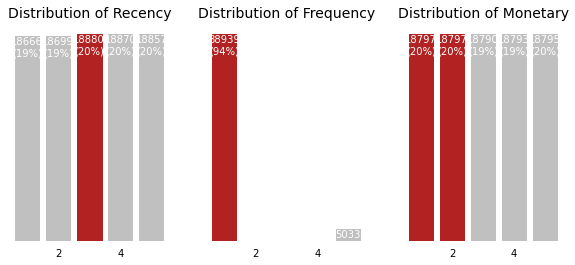

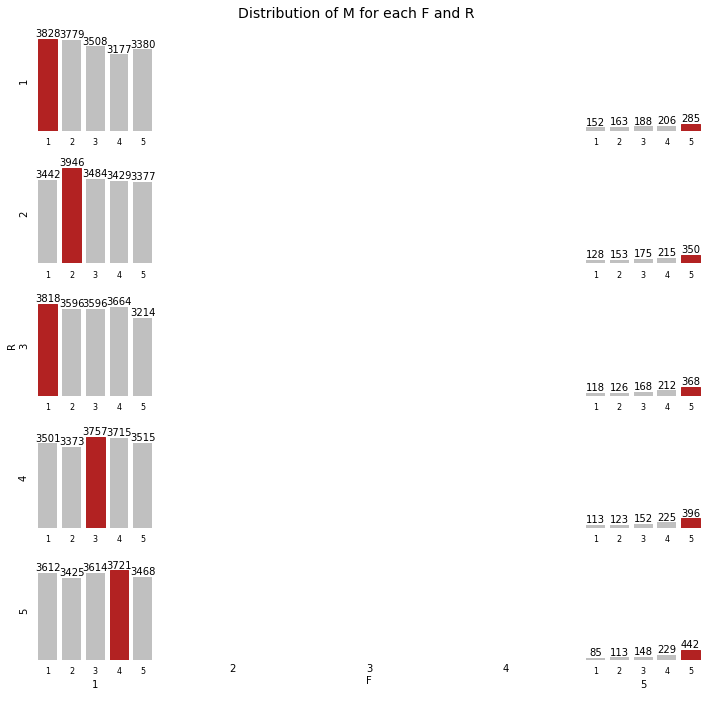

In [28]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

for i, p in enumerate(['R', 'F','M']):
    parameters = {'R':'Recency', 'F':'Frequency','M':'Monetary'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

# Working with cohorts

❓What is a cohort? 

❓Why is it interesting to analyse cohorts ? 

❓What data (already existing in the original dataset) do we need to build a cohort? 

Build a new df with just these 3 features

In [29]:
df_cohort=df[["customer_unique_id", "order_purchase_timestamp", "order_id"]]

In [30]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors

Using the `pandas.Serie.dt.to_period()` methode, create a new feature converting `order_purchase_timestamp` in months

In [31]:
df_cohort['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')

<ipython-input-31-968c2ab0db9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cohort['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')


In [32]:
df_cohort

,customer_unique_id,order_purchase_timestamp,order_id,order_month
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-10 21:25:13,e481f51cbdc54678b7cc49136f2d6af7,2017-10
1,7c396fd4830fd04220f754e42b4e5bff,2017-10-10 21:25:13,e481f51cbdc54678b7cc49136f2d6af7,2017-10
2,7c396fd4830fd04220f754e42b4e5bff,2017-10-10 21:25:13,e481f51cbdc54678b7cc49136f2d6af7,2017-10
3,af07308b275d755c9edb36a90c618231,2018-08-07 15:27:45,53cdb2fc8bc7dce0b6741e2150273451,2018-08
4,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-17 18:06:29,47770eb9100c2d0c44946d9cf07ec65d,2018-08
...,...,...,...,...
105378,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-17 15:08:01,9c5dedf39a927c1b2549525ed64a053c,2017-03
105379,da62f9e57a76d978d02ab5362c509660,2018-02-28 17:37:56,63943bddc261676b46f01ca7ac2f7bd8,2018-02
105380,737520a9aad80b3fbbdad19b66b37b30,2017-09-21 11:24:17,83c1379a015df1e13d02aae0204711ab,2017-09
105381,5097a5312c8b157bb7be58ae360ef43c,2018-01-25 23:32:54,11c177c8e97725db2631073c19f07b62,2018-01


Create a new feature called `cohort` by grouping the previous df by `customer_unique_id`, and tranforming it's minimum value in months (with the same `pandas.Serie.dt.to_period()` as before)

In [33]:
df_cohort['cohort'] = df.groupby('customer_unique_id')['order_purchase_timestamp'] \
                 .transform('min') \
                 .dt.to_period('M') 

<ipython-input-33-2daa0e775725>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cohort['cohort'] = df.groupby('customer_unique_id')['order_purchase_timestamp'] \


In [34]:
from operator import attrgetter

In [35]:
df_cohort

,customer_unique_id,order_purchase_timestamp,order_id,order_month,cohort
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-10 21:25:13,e481f51cbdc54678b7cc49136f2d6af7,2017-10,2017-09
1,7c396fd4830fd04220f754e42b4e5bff,2017-10-10 21:25:13,e481f51cbdc54678b7cc49136f2d6af7,2017-10,2017-09
2,7c396fd4830fd04220f754e42b4e5bff,2017-10-10 21:25:13,e481f51cbdc54678b7cc49136f2d6af7,2017-10,2017-09
3,af07308b275d755c9edb36a90c618231,2018-08-07 15:27:45,53cdb2fc8bc7dce0b6741e2150273451,2018-08,2018-08
4,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-17 18:06:29,47770eb9100c2d0c44946d9cf07ec65d,2018-08,2018-08
...,...,...,...,...,...
105378,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-17 15:08:01,9c5dedf39a927c1b2549525ed64a053c,2017-03,2017-03
105379,da62f9e57a76d978d02ab5362c509660,2018-02-28 17:37:56,63943bddc261676b46f01ca7ac2f7bd8,2018-02,2018-02
105380,737520a9aad80b3fbbdad19b66b37b30,2017-09-21 11:24:17,83c1379a015df1e13d02aae0204711ab,2017-09,2017-09
105381,5097a5312c8b157bb7be58ae360ef43c,2018-01-25 23:32:54,11c177c8e97725db2631073c19f07b62,2018-01,2018-01


In [41]:
df_cohort = df_cohort.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('customer_unique_id', 'nunique')) \
              .reset_index(drop=False)


Now groupby `['cohort', 'order_month']` and aggregate by `nunique()` `customer_unique_id`

Finally, create a feature called `['period_number']` where you substract the `cohort` to the `order_month` and get the `'n'` attribute thanks to the `operator.attrgetter` method

In [43]:
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

Explore a cohort (for example 2017-01) and try to understand what it shows

In [44]:
df_cohort

,cohort,order_month,n_customers,period_number
0,2016-10,2016-10,203,0
1,2016-10,2016-11,1,1
2,2016-10,2017-04,1,6
3,2016-10,2017-08,1,10
4,2016-10,2017-10,1,12
...,...,...,...,...
214,2018-07,2018-08,36,1
215,2018-08,2018-08,8046,0
216,2018-08,2018-09,1,1
217,2018-09,2018-09,54,0


Pivot the DataFrame using the methode : `DataFrame.pivot_table` (hint : use `'cohort'` as `index`, `'period_number'` as columns, and `'n_customers'` as `values`)

In [46]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

Now divide all the values (except you column 0) by the column 0 and name this new DataFrame `retention_matrix`

Plot your `retention matrix` using the code below : 

In [47]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

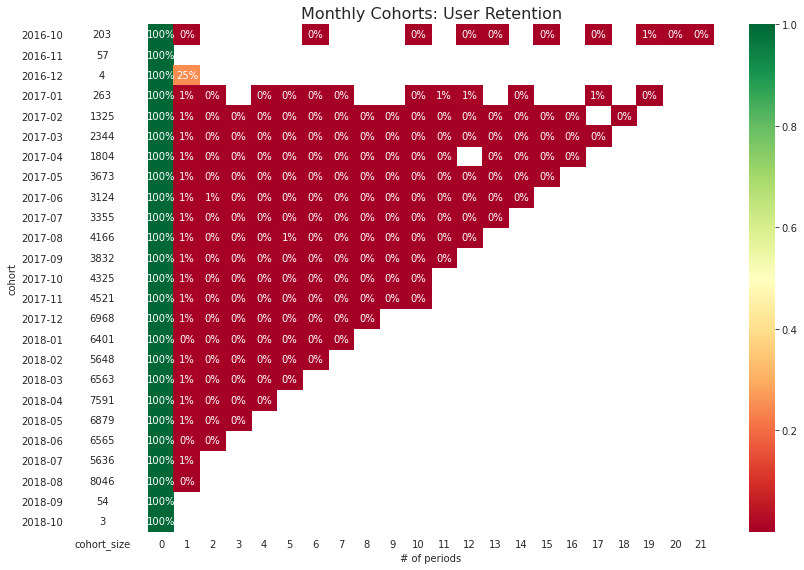

In [48]:

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()


What do you notice? 

How could we have know that before? (hint : Calculate the percentage of customers who have ordered more than once)

Here is the code for the analysis of customers who have bought more than once : 

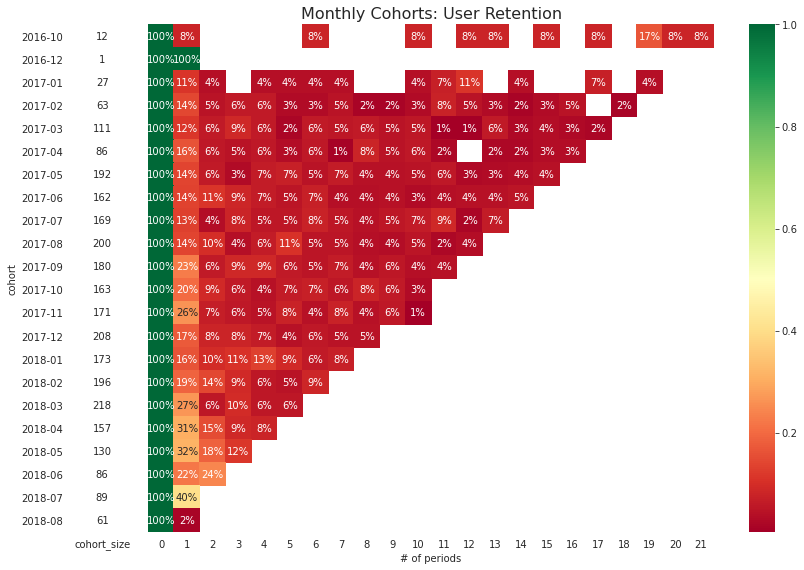

In [49]:
#start from your df created doing the RFM segmentation
df_c = df[['customer_unique_id', 'order_id',
           'order_purchase_timestamp']].drop_duplicates()

df_c['order_month'] = df_c['order_purchase_timestamp'].dt.to_period('M')

df_more = pd.DataFrame(df_c.groupby('customer_unique_id').size()[
                       df_c.groupby('customer_unique_id').size() > 1])

df_c = df_c.merge(df_more, how='left', on='customer_unique_id').rename(
    columns={0: 'na'})

df_c = df_c[df_c['na'].notna()]
df_c['cohort'] = df_c.groupby('customer_unique_id')['order_purchase_timestamp'] \
    .transform('min') \
    .dt.to_period('M')

df_cohort = df_c.groupby(['cohort', 'order_month']) \
    .agg(n_customers=('customer_unique_id', 'nunique')) \
    .reset_index(drop=False)
df_cohort['period_number'] = (
    df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
cohort_pivot = df_cohort.pivot_table(index='cohort',
                                     columns='period_number',
                                     values='n_customers')
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={
                           'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(
        columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()